In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
from lib.vis import plot_session_intervals
from lib.course import LECTURES, ASSIGNMENTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lecture = LECTURES[1]
df = lecture.viewing_data()

In [4]:
df

,time,start,minutes,user,end,lecture
0,2019-09-27 10:24:56,0.000000,0.294124,c799d499-6e22-4882-b6fd-67590919c0fe,17.647464,2
1,2019-09-27 10:24:56,17.696464,0.111573,c799d499-6e22-4882-b6fd-67590919c0fe,24.390837,2
2,2019-09-27 10:24:56,153.134964,0.028315,c799d499-6e22-4882-b6fd-67590919c0fe,154.833879,2
3,2019-09-27 10:24:56,243.807000,0.033587,c799d499-6e22-4882-b6fd-67590919c0fe,245.822236,2
4,2019-09-27 10:24:56,245.000000,0.040160,c799d499-6e22-4882-b6fd-67590919c0fe,247.409589,2
...,...,...,...,...,...,...
3335,2019-10-01 13:45:55,3494.994545,0.123477,7a854988-e2f9-468f-95a1-aad901505a8e,3502.403170,2
3336,2019-10-01 13:45:55,3575.897197,1.251996,7a854988-e2f9-468f-95a1-aad901505a8e,3651.016944,2
3337,2019-10-01 15:14:36,3721.521970,0.063263,7a854988-e2f9-468f-95a1-aad901505a8e,3725.317777,2
3338,2019-10-01 15:14:36,4120.641717,0.045493,7a854988-e2f9-468f-95a1-aad901505a8e,4123.371288,2


In [5]:
df[df['time'].dt.day == 9]

,time,start,minutes,user,end,lecture
1795,2019-10-09 12:42:42,4407.000000,0.155129,6b40dfbd-dd6c-47d9-abb1-a9680175e463,4416.307766,2
1796,2019-10-09 12:42:42,75.485070,0.732877,6b40dfbd-dd6c-47d9-abb1-a9680175e463,119.457710,2
1797,2019-10-09 12:43:12,139.051444,0.021767,6b40dfbd-dd6c-47d9-abb1-a9680175e463,140.357443,2
1798,2019-10-09 12:43:41,147.002426,1.059563,6b40dfbd-dd6c-47d9-abb1-a9680175e463,210.576181,2
1799,2019-10-09 12:44:43,210.802931,1.006065,6b40dfbd-dd6c-47d9-abb1-a9680175e463,271.166851,2
1800,2019-10-09 12:45:12,476.880315,0.044769,6b40dfbd-dd6c-47d9-abb1-a9680175e463,479.566465,2
1801,2019-10-09 12:45:12,723.067513,0.073178,6b40dfbd-dd6c-47d9-abb1-a9680175e463,727.458165,2
1802,2019-10-09 12:45:12,623.745053,0.026025,6b40dfbd-dd6c-47d9-abb1-a9680175e463,625.306556,2
1803,2019-10-09 12:45:12,552.232881,0.027163,6b40dfbd-dd6c-47d9-abb1-a9680175e463,553.862688,2
1804,2019-10-09 12:45:12,484.693608,2.187332,6b40dfbd-dd6c-47d9-abb1-a9680175e463,615.933535,2


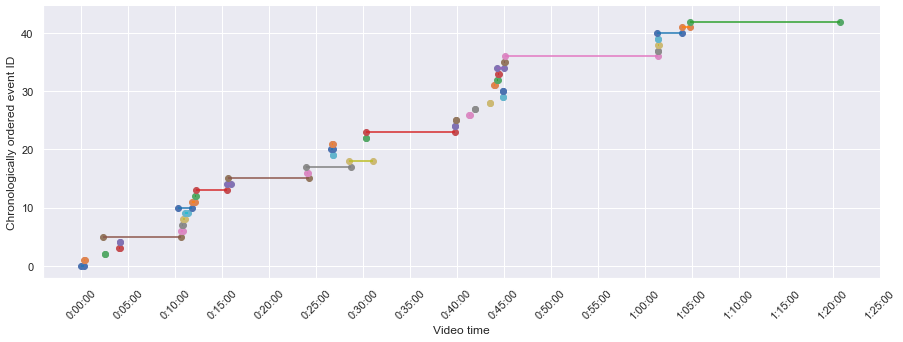

In [6]:
user_ids = df['user'].unique()
plot_session_intervals(df[df['user'] == user_ids[0]])

In [7]:
vd = pd.concat([l.viewing_data() for l in LECTURES])

,time,start,minutes,user,end,lecture,date
0,2019-09-23 21:48:19,0.000000,0.124773,c799d499-6e22-4882-b6fd-67590919c0fe,7.486403,1,2019-09-23
1,2019-09-23 21:48:19,39.827988,0.099284,c799d499-6e22-4882-b6fd-67590919c0fe,45.785032,1,2019-09-23
2,2019-09-23 21:48:19,168.563504,0.017356,c799d499-6e22-4882-b6fd-67590919c0fe,169.604871,1,2019-09-23
3,2019-09-23 21:48:19,160.339947,1.506594,c799d499-6e22-4882-b6fd-67590919c0fe,250.735588,1,2019-09-23
4,2019-09-23 21:49:49,4425.160217,0.029089,c799d499-6e22-4882-b6fd-67590919c0fe,4426.905585,1,2019-09-23
...,...,...,...,...,...,...,...
919,2019-11-15 00:22:32,2691.249116,0.713629,25fba90a-8b98-4410-b050-aafe000ddfcd,2734.066873,16,2019-11-15
920,2019-11-15 00:41:32,2734.624523,2.656539,25fba90a-8b98-4410-b050-aafe000ddfcd,2894.016839,16,2019-11-15
921,2019-11-15 00:52:02,2894.131361,0.221248,25fba90a-8b98-4410-b050-aafe000ddfcd,2907.406247,16,2019-11-15
922,2019-11-15 00:52:02,2907.510747,29.022435,25fba90a-8b98-4410-b050-aafe000ddfcd,4648.856872,16,2019-11-15


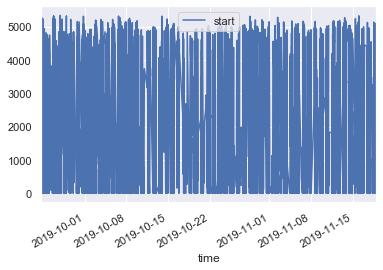

In [8]:
vd.plot("time", "start")

vd["date"] = vd.time.dt.date

vd

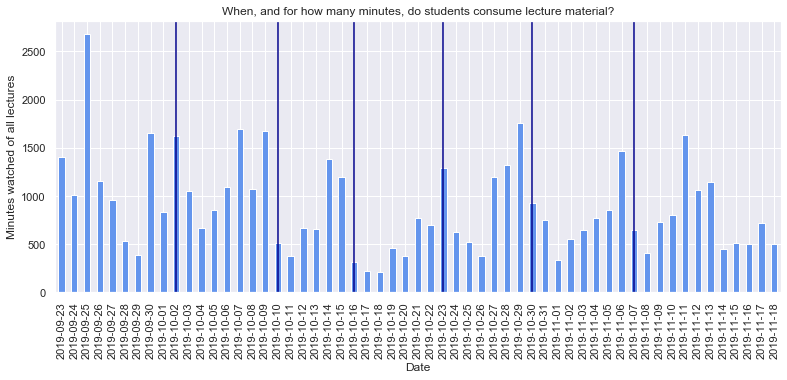

In [57]:
""" How does the classroom engage with lectures? 
"""

from datetime import date
ax = vd.groupby("date").sum().plot.bar(y="minutes", rot=90, figsize=(13, 5), legend=False, color='cornflowerblue')

for assgnment in ASSIGNMENTS:
    # Compute assignment deadline with respect to the first lecture date (ax plots lines using indexes)
    delta = assgnment.duedate - LECTURES[0].date 
    ax.axvline(x=delta.days, color='darkblue')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Minutes watched of all lectures')
    ax.set_title('When, and for how many minutes, do students consume lecture material?')

In [10]:
# df1 = vd.groupby(["user", "date"]).sum().reset_index()
# df2 = df1[(df.minutes > 30)].groupby("user").std()
# user_order = df2[df2.minutes.notna()].sort_values(by=['minutes'], ascending=False)
# user_order

In [11]:
# """ How does each individual student engage with lectures? 
# """

# df1 = vd.groupby(["user", "date"]).sum().reset_index()
# df2 = df1[(df.minutes > 30)].groupby("user").std()
# user_order = df2[df2.minutes.notna()].sort_values(by=['minutes'], ascending=False).index

In [12]:
# g = sns.FacetGrid(
#     df[df.user.isin(user_order)], col_order=user_order,
#     col="user", col_wrap=4)

# g.map(plt.bar, "date", "minutes")

# BUG: Boolean Series key will be reindexed to match DataFrame index.

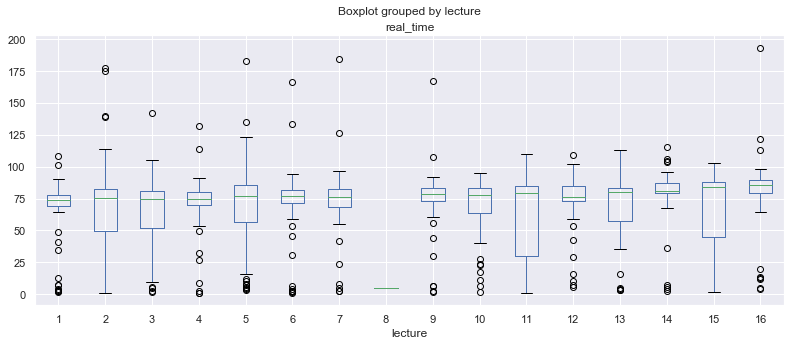

In [13]:
""" What is the distribution of minutes watched per lecture? 
"""

df = vd.groupby(["lecture", "user"]).sum().reset_index()
df['real_time'] = (df['end'] - df['start'])/60 
df[df.real_time > 1].boxplot('real_time', by='lecture', figsize=(13, 5))